In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cars=pd.read_csv('car_evaluation.csv')
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
for i in cars.columns:
    print(cars[i].unique(),"\t",cars[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [9]:
for i in cars.columns:
    print(cars[i].value_counts())
    print()

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64

vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64

2        432
3        432
4        432
5more    432
Name: doors, dtype: int64

2       576
4       576
more    576
Name: persons, dtype: int64

small    576
med      576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



C:\Users\Uttu_Joshi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

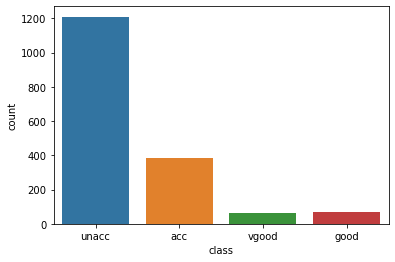

In [11]:
import seaborn as sns
sns.countplot(cars['class'])

In [13]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [14]:
for i in cars.columns:
    cars[i]=lb.fit_transform(cars[i])

In [15]:
cars.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [21]:
X=cars.drop('class',axis='columns')
y=cars['class']

In [22]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
knn.score(X_test,y_test)

0.9017341040462428

In [44]:
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       118
           1       0.77      0.53      0.62        19
           2       0.93      0.99      0.96       358
           3       1.00      0.50      0.67        24

    accuracy                           0.90       519
   macro avg       0.88      0.70      0.76       519
weighted avg       0.90      0.90      0.90       519



In [47]:
from sklearn.model_selection import cross_val_score
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

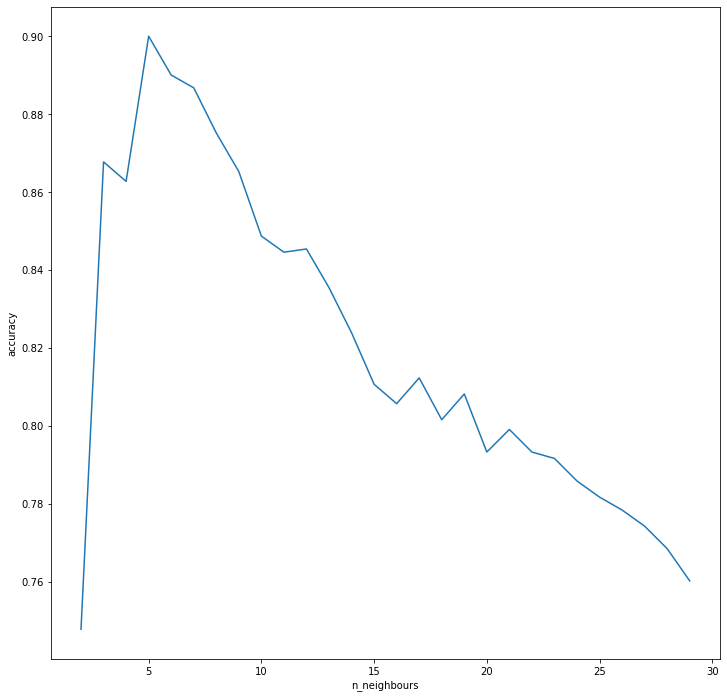

In [48]:
plt.figure(figsize=(12,12))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [52]:
rfc=RandomForestClassifier()

In [53]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
rfc.score(X_test,y_test)

0.9653179190751445

In [55]:
pred=rfc.predict(X_test)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       118
           1       0.68      0.89      0.77        19
           2       1.00      0.99      0.99       358
           3       0.95      0.88      0.91        24

    accuracy                           0.97       519
   macro avg       0.89      0.92      0.90       519
weighted avg       0.97      0.97      0.97       519

